# 02. Neural Network Classification In Pytorch

## 1. Make classification data and get it read

In [ ]:
import sklearn

In [ ]:
from sklearn.datasets import make_circles

# make 1000 samples
n_samples = 1000

# create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [ ]:
len(X), len(y)

(1000, 1000)

In [ ]:
print(f"print first 5 samples of X:\n {X[:5]}")
print(f"\n print first 5 samples of y:\n {y[:5]}")

print first 5 samples of X:
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]

 print first 5 samples of y:
 [1 1 1 1 0]


In [ ]:
import pandas as pd
circles = pd.DataFrame({"X1": X[:, 0],
                        "X2": X[:, 1],
                        "label": y})

circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


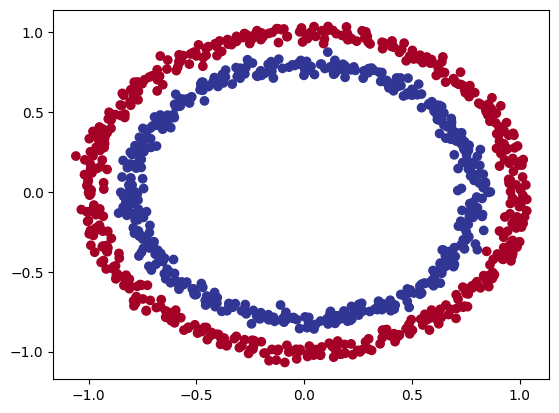

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu);

### 1.1 Check input and output shapes

In [ ]:
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
# view the first example of features and labels
X_sample = X[0]
y_sample = y[0]

print(f"values for one sample of x: {X_sample} | and the same for y: {y_sample}")
print(f"shapes for one sample of x: {X_sample.shape} | and the same for y: {y_sample.shape}")

values for one sample of x: [0.75424625 0.23148074] | and the same for y: 1
shapes for one sample of x: (2,) | and the same for y: ()


### 1.2 Turn data into tensors and create train and test splits

In [ ]:
import torch
torch.__version__

'2.1.0+cu121'

In [ ]:
type(X)

numpy.ndarray

In [ ]:
# Turn the data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [ ]:
type(X), X.dtype, y.dtype

(torch.Tensor, torch.float32, torch.float32)

In [ ]:
torch.manual_seed(42)

In [ ]:
# split data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42) # manual_seed

In [ ]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

## 2. Building a model

lets build a model to classify our blue and red Dots
1. Setup device agnostic code so our code will run on an accelerator (GPU) if there is one
2. construct a model (by subclassing nn.Module)
3. define a loss function and optimizer
4. create a training and test loop

In [ ]:
from torch import nn

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

Now we have setup device agnostic code, lets create a model that:

1. Subclasses `nn.module`
2. create 2 `nn.linear()` layers that are capable of handling the shapes of our data
3. defines a `forward()` method that outlines the forward pass (or forward computaion) of the model
4. instantiate an instance of our model class and send it to the target device

In [ ]:
# 1. construct a model that subclasses nn.Module
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    # 2. Create 2 nn.Linear layers
    self.layer_1 = nn.Linear(in_features=2, out_features=5) # takes in 2 features and upscales to 5 features.. (hyperparameter: the data can learn from 5 numbers)
    self.layer_2 = nn.Linear(in_features=5, out_features=1) # takes in 5 features from previous layer and outputs a single feature ()

  # 3. define a forward method
  def forward(self, x):
    return self.layer_2(self.layer_1(x)) # x -> layer_1 -> layer_2 -> output

# 4. Instantiate an instance of our model class
model_0 = CircleModelV1().to(device)
model_0

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
next(model_0.parameters()).device

device(type='cuda', index=0)

### Lets replicate the model up above using nn.Sequential()


In [ ]:
# Lets replicate the model up above using nn.Sequential()

model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0829, -0.2872],
                      [ 0.4691, -0.5582],
                      [-0.3260, -0.1997],
                      [-0.4252,  0.0667],
                      [-0.6984,  0.6386]], device='cuda:0')),
             ('0.bias',
              tensor([-0.6007,  0.5459,  0.1177, -0.2296,  0.4370], device='cuda:0')),
             ('1.weight',
              tensor([[ 0.0697,  0.3613,  0.0489, -0.1410,  0.1202]], device='cuda:0')),
             ('1.bias', tensor([-0.1213], device='cuda:0'))])

In [ ]:
# make predictions
untrained_preds = model_0(X_test.to(device))
print(f'Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}')
print(f'length of test samples {len(X_test)}, shape: {X_test.shape}')
print(f'\n First 10 predictions:\n {(untrained_preds[:10])}')
print(f'\n first 10 labels: \n {y_test[:10]}')

Length of predictions: 200, Shape: torch.Size([200, 1])
length of test samples 200, shape: torch.Size([200, 2])

 First 10 predictions:
 tensor([[-0.0338],
        [-0.0309],
        [ 0.0894],
        [-0.0692],
        [ 0.2967],
        [ 0.2968],
        [ 0.1405],
        [ 0.2178],
        [ 0.0805],
        [-0.0284]], device='cuda:0', grad_fn=<SliceBackward0>)

 first 10 labels: 
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


### 2.1 setup loss function and optimizer

Which loss function or optimizer should you use?
again... this is problem specific.

For example:
For regression you might want MAE or MSE (mean absolute error or mean squared error).

For classification you might want binary cross entropy or categorical cross entropy(cross entropy)

As a reminder a loss function mesures how wrong your models predictions are.

And for optimizers, two of the most common and useful are SGD and ADAM.
pytorch has many built in options

* for the loss function we are going to use `torch.nn.BCEWithLogitsLoss()`



In [ ]:
# setup the loss function
# loss_fn = nn.BCEloss() # BCEloss requires inputs to have already gone through the sigmoid activation function prior to input to BCEloss
loss_fn = nn.BCEWithLogitsLoss() # BCEwithLogitsLoss = sigmoid activation function built in

optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

In [ ]:
# calculate the accuracy - out of 100 examples
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct / len(y_pred)) * 100
  return acc


## 3. Training the model

To train our model we have to create a training loop:
1. forward pass
2. calculate the loss
3. optimizer zero grad
4. loss backward(backpropagation)
5. optimizer step (gradient descent)

### 3.1 Going from raw logits -> prediction probabilities -> prediction labels

our models outputs are going to be raw **logits**.
we can convert these **logits** into prediction probabilities by passing them to some kind of activation function (e.g. sigmoid for binary crossentropy and softmax for multiclass classification)

Then we can convert our models prediction probabilities to **prediction labels** by either rounding them or taking the argmax()

In [ ]:
# View the first 5 outputs of the forward pass on the test data
y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[-0.0338],
        [-0.0309],
        [ 0.0894],
        [-0.0692],
        [ 0.2967]], device='cuda:0', grad_fn=<SliceBackward0>)

In [ ]:
# Use the sigmoid activation function on out model logits to turn them into prediction probabilities
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4916],
        [0.4923],
        [0.5223],
        [0.4827],
        [0.5736]], device='cuda:0', grad_fn=<SigmoidBackward0>)

For our prediction probability values,  we need to perform a range-style rounding on them
* `y_pred_probs` >= 0.5,  `y = 1` (class 1)
* `y_pred_probs` < 0.5,  `y = 0` (class 0)

In [ ]:
# Find the predicted labels
y_preds = torch.round(y_pred_probs)

# in full (logits -> pred probs -> pred labels)
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

# check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# get rid of the extra diminsion
y_preds.squeeze()

tensor([True, True, True, True, True], device='cuda:0')


tensor([0., 0., 1., 0., 1.], device='cuda:0', grad_fn=<SqueezeBackward0>)

### 3.2 Building a training and testing loop

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# set the number of epochs
epochs = 100

# Put the data to the target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Build training and evaluation loop
for epoch in range(epochs):
  model_0.train()

  # forward the pass
  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits -> into pred probs -> then into pred labels

  # calculate the loss and accuracy
  # loss = loss_fn(torch.sigmoid(y_logits), # nn.BCELoss expects prediction probabilities as input
  #                y_train)
  loss = loss_fn(y_logits, # nn.BCEWithlogitsloss() expects raw logits as input
                 y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)

  # optimizer zero grad
  optimizer.zero_grad()

  # loss backward (backpropagation)
  loss.backward()

  # optimizer step
  optimizer.step()

  ### Testing
  model_0.eval()
  with torch.inference_mode():
    # forward pass
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # calculate the test loss/accuracy
    test_loss = loss_fn(test_logits,
                       y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)

  # print out whats happening
  if epoch % 10 == 0:
    print(f"the epoch: {epoch} | the loss {loss:.5f} | Acc: {acc:.2f} | Test loss: {test_loss:.5f}, Test acc {test_acc:.2f}%")


the epoch: 0 | the loss 0.69796 | Acc: 51.88 | Test loss: 0.69440, Test acc 58.00%
the epoch: 10 | the loss 0.69590 | Acc: 51.25 | Test loss: 0.69305, Test acc 53.00%
the epoch: 20 | the loss 0.69490 | Acc: 51.62 | Test loss: 0.69254, Test acc 49.50%
the epoch: 30 | the loss 0.69435 | Acc: 51.12 | Test loss: 0.69236, Test acc 49.50%
the epoch: 40 | the loss 0.69401 | Acc: 50.88 | Test loss: 0.69232, Test acc 51.00%
the epoch: 50 | the loss 0.69378 | Acc: 50.25 | Test loss: 0.69234, Test acc 50.00%
the epoch: 60 | the loss 0.69362 | Acc: 50.00 | Test loss: 0.69239, Test acc 51.50%
the epoch: 70 | the loss 0.69351 | Acc: 50.25 | Test loss: 0.69246, Test acc 51.00%
the epoch: 80 | the loss 0.69342 | Acc: 49.88 | Test loss: 0.69254, Test acc 50.00%
the epoch: 90 | the loss 0.69336 | Acc: 49.88 | Test loss: 0.69262, Test acc 53.00%


## 4. Make predictions

In [ ]:
import requests # allows you to request code from external sources
from pathlib import Path

# download helper functions from learn python repo (if its not already downloaded)
if Path('helper_functions.py').is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

downloading helper_functions.py


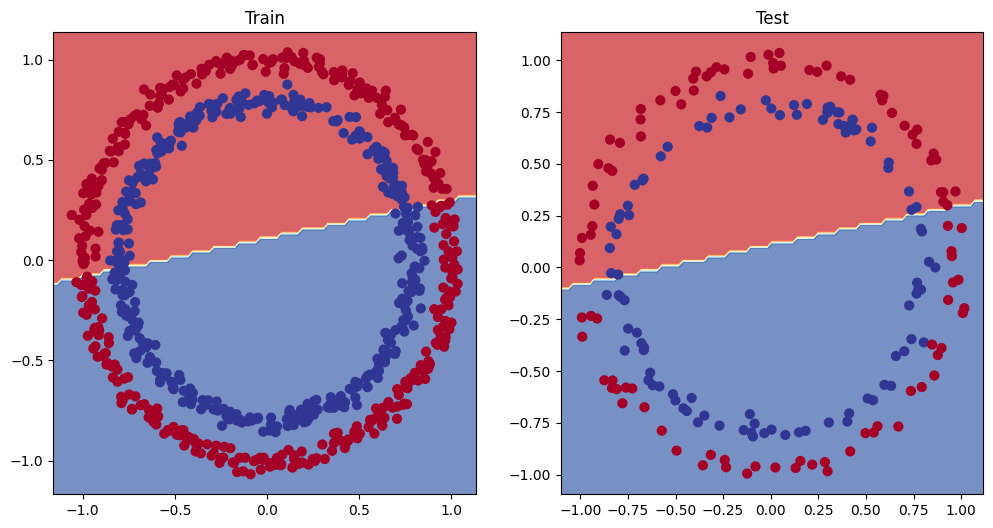

In [ ]:
# plot decision boundary of the model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)


## 5. Improving a model (from a model perspective)

* Add more layers - give the model more chances to learn about patterns in the data
* Add more hidden units - go from 5 hidden units(in/outputs) to 10 hidden units
* Fit for longer - run it for 1000 epochs instead of 200
* Changing the activation function
* Change the learning rate
* Change the loss function

These options are all from a models perspective because they deal directly with the model, rather than the data

Lets try and improve our model by:
* Adding more hidden units: 5 -> 10
* Increase the number of layers: 2 -> 3
* Increase the number of epochs: 100 -> 1000

**NOTE**: in any experiment you should usually change one hyper parameter at a time so you can track which one is beneficial

In [ ]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0849, -0.2762],
                      [ 0.4610, -0.5187],
                      [-0.3271, -0.1947],
                      [-0.4220,  0.0507],
                      [-0.7016,  0.6600]])),
             ('0.bias', tensor([-0.6060,  0.5246,  0.1149, -0.2211,  0.4275])),
             ('1.weight',
              tensor([[ 0.0741,  0.2406,  0.0222, -0.1075,  0.1965]])),
             ('1.bias', tensor([-0.1888]))])

In [ ]:
class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10) # in features is two because x_train has two features
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)

  def forward(self, x):
    # z = self.layer_1(x)
    # z = self.layer_2(z)
    # z = self.layer_3(z)
    return self.layer_3(self.layer_2(self.layer_1(x))) # this way of writing operations leverages speed ops where possible behind the scenes

model_1 = CircleModelV2().to(device)
model_1

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
model_1.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802]], device='cuda:0')),
             ('layer_1.bias',
              tensor([-0.3258, -0.0829, -0.2872,  0.4691, -0.5582, -0.3260, -0.1997, -0.4252,
                       0.0667, -0.6984], device='cuda:0')),
             ('layer_2.weight',
              tensor([[ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
                        0.0346, -0.0997],
                      [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
                        0.1606, -0.1927],
                      [-0.3130, -0.122

In [ ]:
# create a loss fn
loss_fn = nn.BCEWithLogitsLoss()

# create an optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)



In [ ]:
# write a training and evaluation loop for model_1
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# train for longer
epochs = 1000

# put data on the target device
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)


for epoch in range(epochs):
  ### Training
  model_1.train()
  # do the forward pass
  y_logits = model_1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> prediction probabilities -> prediction labels

  # calculate the loss
  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)

  # optimize zero grad
  optimizer.zero_grad()

  # loss backwards
  loss.backward()

  # optimizer step
  optimizer.step()

  ### testing
  model_1.eval()
  with torch.inference_mode():
    # forward pass
    test_logits = model_1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    # calculate the loss
    test_loss = loss_fn(test_logits,
                        y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)

    # print out whats happenin
    if epoch % 100 == 0:
      print(f"epoch: {epoch} | loss: {loss:.5f} | acc:{acc:.2f}% | test loss: {test_loss:.5f} | test acc: {test_acc:.2f}%")


epoch: 0 | loss: 0.69396 | acc:50.88% | test loss: 0.69261 | test acc: 51.00%
epoch: 100 | loss: 0.69305 | acc:50.38% | test loss: 0.69379 | test acc: 48.00%
epoch: 200 | loss: 0.69299 | acc:51.12% | test loss: 0.69437 | test acc: 46.00%
epoch: 300 | loss: 0.69298 | acc:51.62% | test loss: 0.69458 | test acc: 45.00%
epoch: 400 | loss: 0.69298 | acc:51.12% | test loss: 0.69465 | test acc: 46.00%
epoch: 500 | loss: 0.69298 | acc:51.00% | test loss: 0.69467 | test acc: 46.00%
epoch: 600 | loss: 0.69298 | acc:51.00% | test loss: 0.69468 | test acc: 46.00%
epoch: 700 | loss: 0.69298 | acc:51.00% | test loss: 0.69468 | test acc: 46.00%
epoch: 800 | loss: 0.69298 | acc:51.00% | test loss: 0.69468 | test acc: 46.00%
epoch: 900 | loss: 0.69298 | acc:51.00% | test loss: 0.69468 | test acc: 46.00%


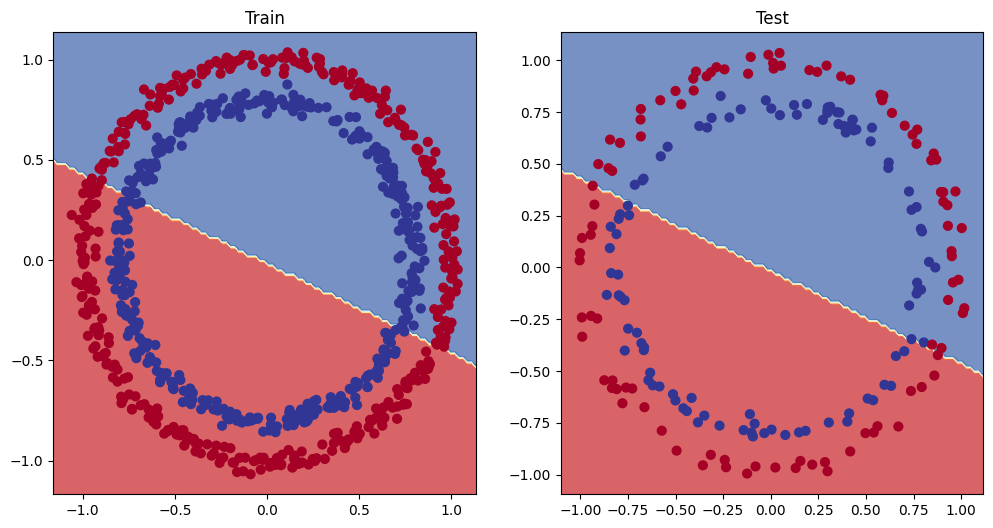

In [ ]:
# plot the descision boundary
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

### 5.1 preparring data to see if the model can fit a straight line

one way to troubleshoot a larger problem is to test out a smaller problem

In [ ]:
# create some data (same as notebook 01)
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

# create data
x_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression =  weight * x_regression + bias # linear regression formula

# check the data
print(len(x_regression))
print(len(y_regression))

100
100


In [ ]:
train_split = int(0.8 * len(x_regression))
x_train_regression = x_regression[:train_split]
y_train_regression = y_regression[:train_split]
x_test_regression = x_regression[train_split:]
y_test_regression = y_regression[train_split:]

len(x_train_regression), len(y_train_regression), len(x_test_regression), len(y_test_regression)


(80, 80, 20, 20)

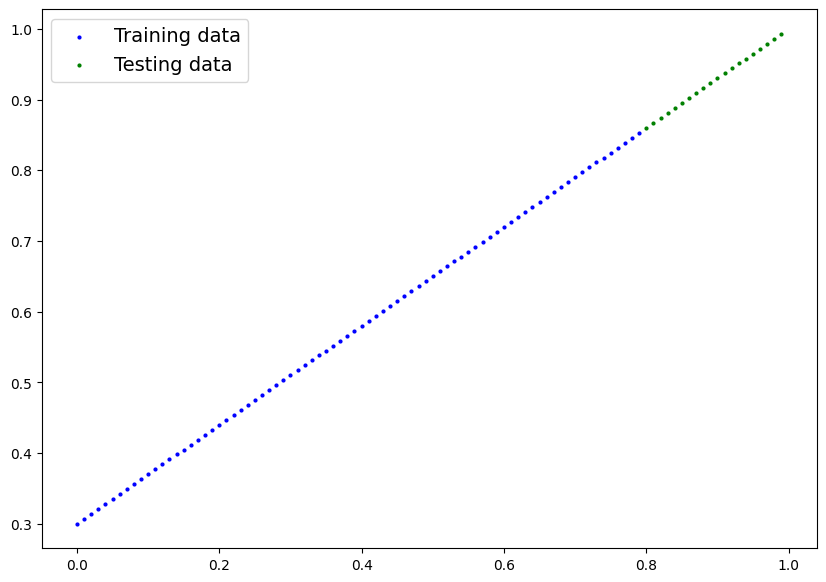

In [ ]:
plot_predictions(x_train_regression, y_train_regression, x_test_regression, y_test_regression)

### 5.3 adjusting 'model_1' to fit a straight line

In [ ]:
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
# create a loss function

loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(model_2.parameters(),
                            lr=0.01)


In [ ]:
# train the model
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1000

# put the data on the target device
x_train_regression, y_train_regression = x_train_regression.to(device), y_train_regression.to(device)
x_test_regression, y_test_regression = x_test_regression.to(device), y_test_regression.to(device)

for epoch in range(epochs):
  model_2.train()
  y_pred = model_2(x_train_regression)
  loss = loss_fn(y_pred, y_train_regression)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  ### testing
  model_2.eval()
  with torch.inference_mode():
    test_pred = model_2(x_test_regression)
    test_loss = loss_fn(test_pred, y_test_regression)

  # print out whats happening
  if epoch % 100 == 0:
    print(f"epoch: {epoch} | loss: {loss:.5f} | test loss: {test_loss:.5f}")



epoch: 0 | loss: 0.75986 | test loss: 0.91103
epoch: 100 | loss: 0.02858 | test loss: 0.00081
epoch: 200 | loss: 0.02533 | test loss: 0.00209
epoch: 300 | loss: 0.02137 | test loss: 0.00305
epoch: 400 | loss: 0.01964 | test loss: 0.00341
epoch: 500 | loss: 0.01940 | test loss: 0.00387
epoch: 600 | loss: 0.01903 | test loss: 0.00379
epoch: 700 | loss: 0.01878 | test loss: 0.00381
epoch: 800 | loss: 0.01840 | test loss: 0.00329
epoch: 900 | loss: 0.01798 | test loss: 0.00360


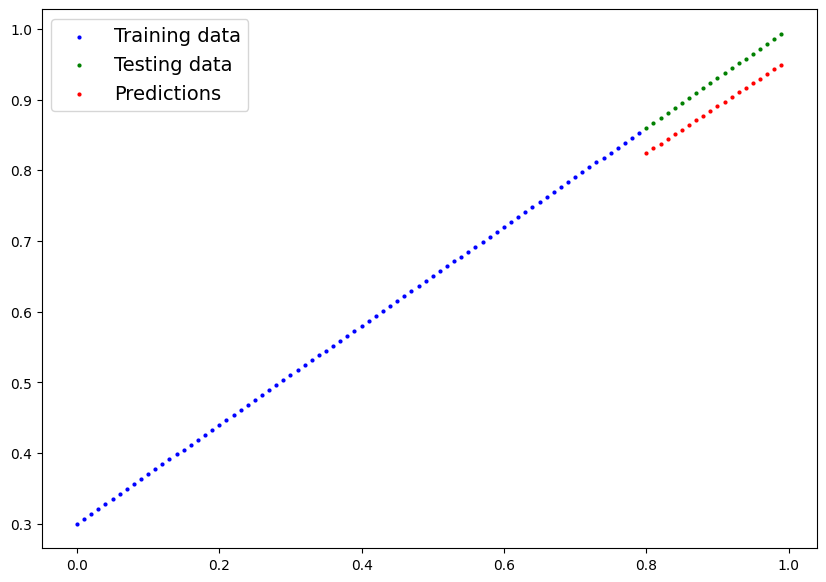

In [ ]:
# Turn on evaluation mode
model_2.eval()

# make predictions (inference)
with torch.inference_mode():
  y_preds = model_2(x_test_regression)

# plot data and predictions
plot_predictions(x_train_regression.cpu(),
                 y_train_regression.cpu(),
                 x_test_regression.cpu(),
                 y_test_regression.cpu(),
                 predictions=y_preds.cpu())

## 6. The missing piece: Non-Linearity

"What patterns could you draw if you were given an infinite amount of straight and non straight lines?"

### 6.1 Recreatinng Non-linear data (red and blue circles)

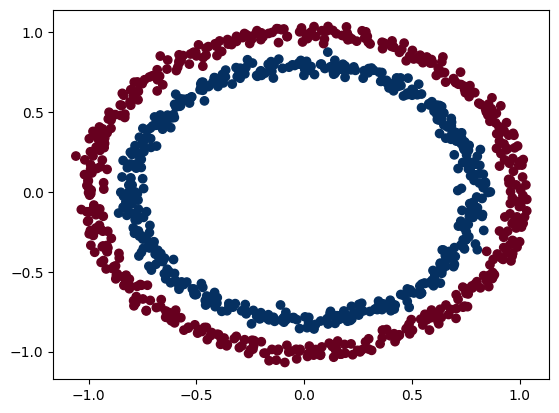

In [ ]:
# make and plot data

n_samples = 1000

X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu)

In [ ]:
# convert the data to tensors and then to train and test splits
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# split the data into train and test splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

### 6.2 building a model with non-linearatity

Artificial neural networks are a large combination of linear (straight) and non-linear functions which are potentially able to find patterns in data

In [ ]:
# Build a model with non-linear activation functions

class CircleModelV3(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)
    self.relu = nn.ReLU() # relu is a non-linear activation function

  def forward(self, x):
    # Where should we put our non-linear activation functions?
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = CircleModelV3().to(device)
model_3


CircleModelV3(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [ ]:
# setup loss and optimizer
loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(model_3.parameters(),
                            lr=0.1)

### 6.3 training a model with non-linearity

In [ ]:
# Random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# put all the data on the target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# loop through the data
epochs = 1000

for epoch in range(epochs):
  ### training
  model_3.train()

  # forward pass
  y_logits = model_3(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) # logits - predictions probs - prob labels

  # calculate the loss
  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_train,  y_pred)

  # optimizer zero grad
  optimizer.zero_grad()

  # backpropagation
  loss.backward()

  # gradient descent
  optimizer.step()


  ### testing
  model_3.eval()
  with torch.inference_mode():
    test_logits = model_3(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_test, test_pred)

  if epoch % 100 == 0:
      print(f"epoch {epoch} | loss {loss:.5f} | acc: {acc:.5f} | test loss: {test_loss:.5f} | test acc: {test_acc:.5f}")


epoch 0 | loss 0.69295 | acc: 50.00000 | test loss: 0.69319 | test acc: 50.00000
epoch 100 | loss 0.69115 | acc: 52.87500 | test loss: 0.69102 | test acc: 52.50000
epoch 200 | loss 0.68977 | acc: 53.37500 | test loss: 0.68940 | test acc: 55.00000
epoch 300 | loss 0.68795 | acc: 53.00000 | test loss: 0.68723 | test acc: 56.00000
epoch 400 | loss 0.68517 | acc: 52.75000 | test loss: 0.68411 | test acc: 56.50000
epoch 500 | loss 0.68102 | acc: 52.75000 | test loss: 0.67941 | test acc: 56.50000
epoch 600 | loss 0.67515 | acc: 54.50000 | test loss: 0.67285 | test acc: 56.00000
epoch 700 | loss 0.66659 | acc: 58.37500 | test loss: 0.66322 | test acc: 59.00000
epoch 800 | loss 0.65160 | acc: 64.00000 | test loss: 0.64757 | test acc: 67.50000
epoch 900 | loss 0.62362 | acc: 74.00000 | test loss: 0.62145 | test acc: 79.00000


### evaluating a model trained with non-linear activation functions

In [ ]:
# Make predictions
model_3.eval()
with torch.inference_mode():
  y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()
y_preds[:10], y_test[:10]

(tensor([1., 0., 1., 0., 0., 1., 0., 0., 1., 0.], device='cuda:0'),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'))

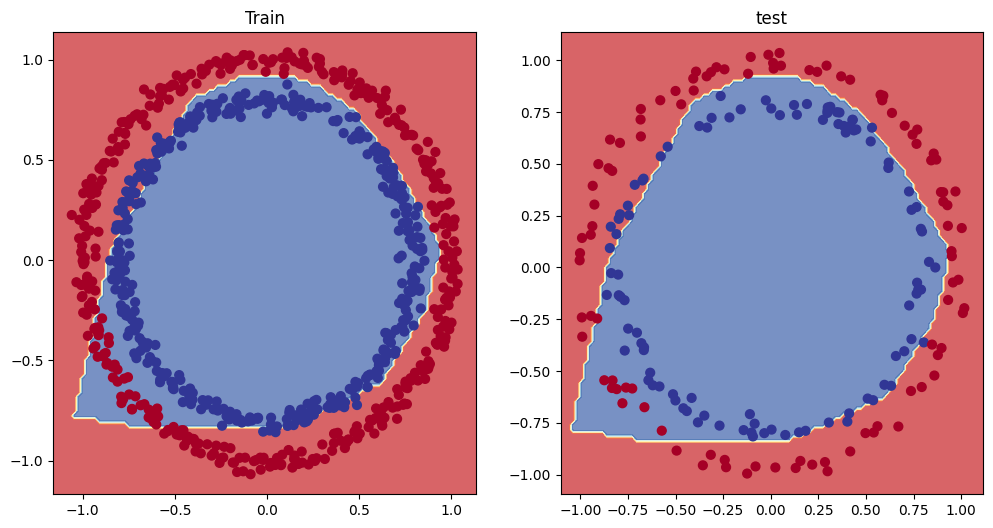

In [ ]:
# plot the descision boundaries
plt.figure(figsize= (12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_3, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("test")
plot_decision_boundary(model_3, X_test, y_test)

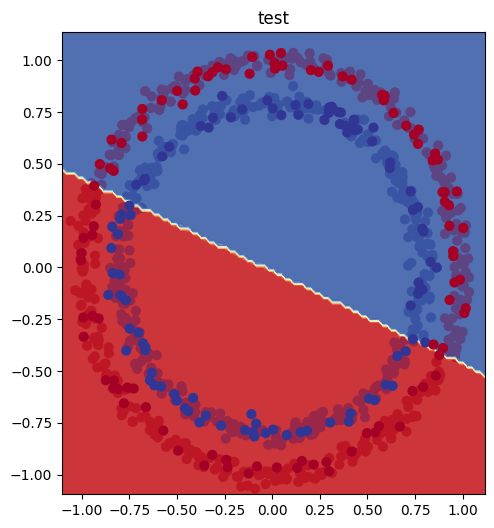

In [ ]:

plt.figure(figsize= (12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 1)
plt.title("test")
plot_decision_boundary(model_1, X_test, y_test)

## 7. Replicating non-linear activation functions

In [ ]:
# create a tensor
A = torch.arange(-10, 10, 1, dtype=torch.float32)
A.dtype

torch.float32

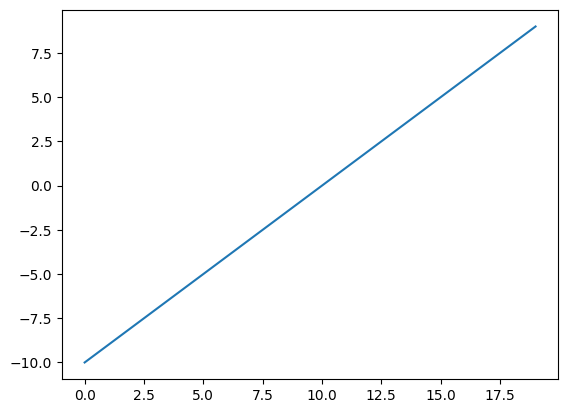

In [ ]:
# Visulaize the tensor
plt.plot(A)

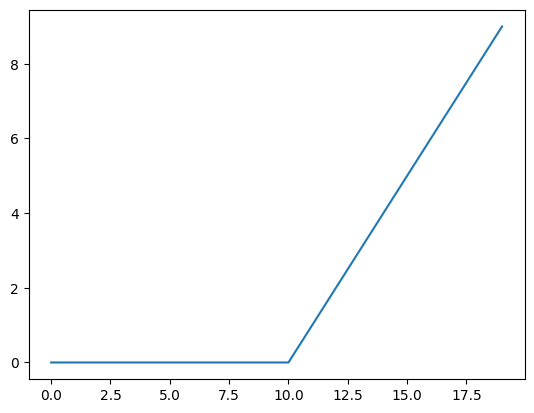

In [ ]:
plt.plot(torch.relu(A))

In [ ]:
def relu(x: torch.Tensor) -> torch.Tensor():
  return torch.maximum(torch.tensor(0), x) # inputs must be tensors

relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

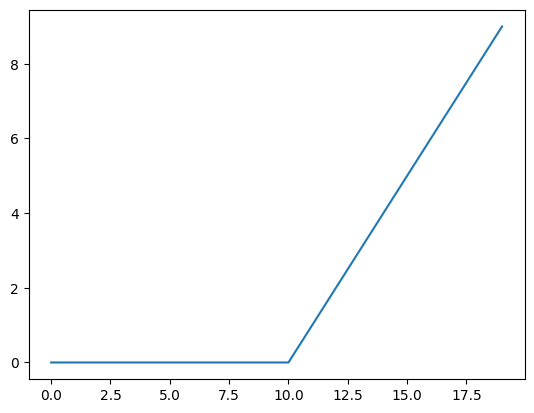

In [ ]:
# plot relu activation function
plt.plot(relu(A))

In [ ]:
# now lets do the same for sigmoid
def sigmoid(x):
  return 1 / (1 + torch.exp(-x))

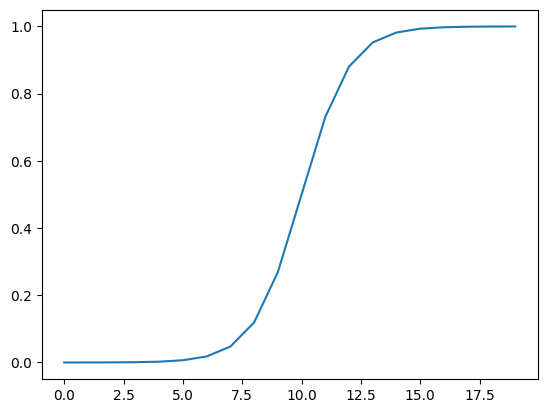

In [ ]:
plt.plot(torch.sigmoid(A))

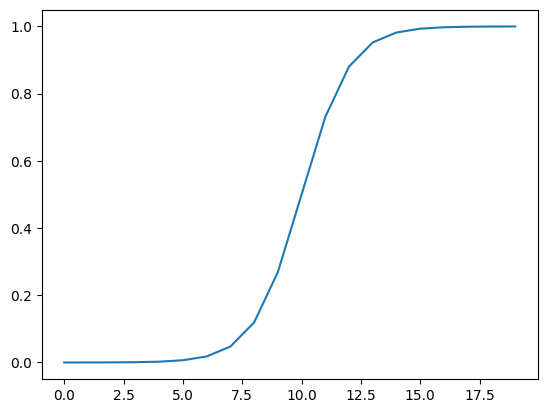

In [ ]:
plt.plot(sigmoid(A))

## 8. Putting it all together with a multiclass classifaction model

* Binary classification = one thing or another (cat and dog, spam vs not spam, fraud or not fraud)

* multi-class classification = more than one thing or another (cat vs dog vs bird)

In [ ]:
### 8.1 creating a toy multi-class classification dataset
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# set the hyper parameters
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. create multiclass data
X_blob, y_blob = make_blobs(n_samples=1000,
                            n_features=NUM_FEATURES,
                            centers=NUM_CLASSES,
                            cluster_std=1.5, # give the clusters a litte shake up
                            random_state=RANDOM_SEED)

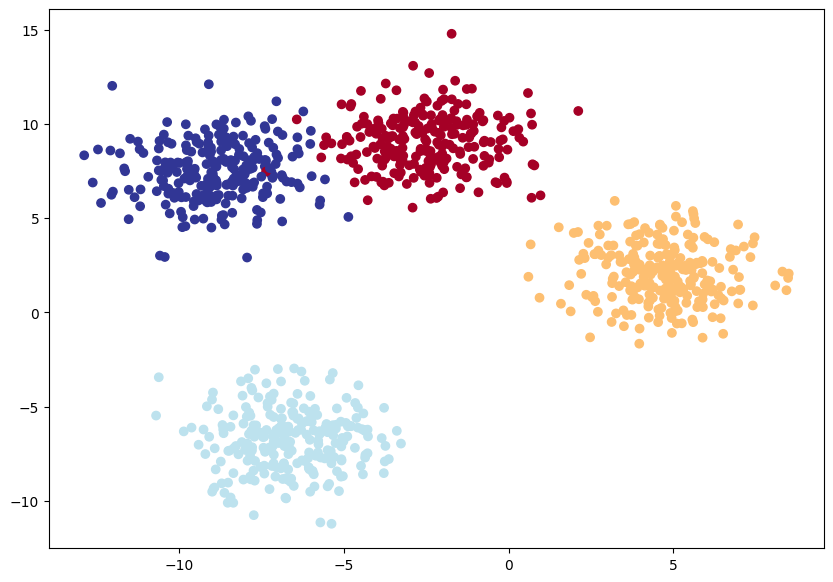

In [ ]:
# 2. Turn the data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

# 3. split into training and test splits
X_train, X_test, y_train, y_test = train_test_split(X_blob, y_blob, test_size=0.2, random_state=RANDOM_SEED)

# 4. plot the data
plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu)

### 8.2 Building a multi-class classification model in pytorch

In [ ]:
# create device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"


In [ ]:
# build a multi-class classification model
class BlobModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units=8):
    """ Initializes multi-class classification model.

    Args:
      input_features (int): Number of input features to the model
      output_features (int): Number of output features (number of output classes)
      hidden_units (int): Number of hidden units between layers, default is 8

    """

    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=input_features, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_features)
    )

  def forward(self, x):
    return self.linear_layer_stack(x) # whatever input goes into the forward method will be passed through the layers "sequintially"

# create an instance of the blob model and send it to the target device
model_4 = BlobModel(input_features=2, # how many features (x) has
                    output_features=4,  # how many classes are in (y)
                    hidden_units=8).to(device)

model_4


BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [ ]:
X_train.shape, y_train.shape

(torch.Size([800, 2]), torch.Size([800]))

In [ ]:
torch.unique(y_train)

tensor([0, 1, 2, 3])

### 8.3 Create a loss function and an optimizer for a multi-class classification model

In [ ]:
# Create a loss function for multi-class classification
loss_fn = nn.CrossEntropyLoss()

# create an optimizer for multi-class classification
optimizer = torch.optim.SGD(params=model_4.parameters(),
                            lr=0.1)


### 8.4 Getting prediction probabilities for multi-class Pytho model

we have to convert our models raw (logit) outputs to prediction probabilities and then to prediction labels

**The Steps**:
1. -> Logits (raw outputs of the model)
2. -> pred probs (use `torch.softmax`)
3. -> pred labels (take the argmax of the prediction probabilities)

In [ ]:
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_test.to(device))

y_logits[:10]

tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834],
        [-0.1497, -1.0617, -0.7107, -0.1645],
        [ 0.1539, -0.2887,  0.1520, -0.0109],
        [-0.2154, -1.1795, -0.9300, -0.2745],
        [ 0.2443, -0.2472,  0.1649,  0.0061],
        [-0.2329, -1.2120, -0.9849, -0.3004]], device='cuda:0')

In [ ]:
# convert our models logit outputs to prediction probabilities and then to prediction labels
y_pred_probs = torch.softmax(y_logits, dim=1)
print(y_logits[:5])
print(y_pred_probs[:5]) # each value in a row represents the percentage of it belonging to one of our 4 classes

tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834]], device='cuda:0')
tensor([[0.3169, 0.3244, 0.1405, 0.2182],
        [0.3336, 0.1432, 0.2026, 0.3206],
        [0.3011, 0.1843, 0.2823, 0.2323],
        [0.3078, 0.2766, 0.1836, 0.2320],
        [0.3719, 0.1286, 0.1532, 0.3463]], device='cuda:0')


In [ ]:
torch.sum(y_pred_probs[0])

tensor(1., device='cuda:0')

In [ ]:
torch.argmax(y_pred_probs[0])

tensor(1, device='cuda:0')

In [ ]:
# convert our models prediction probabilities to prediction labels
y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds

tensor([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 0, 1], device='cuda:0')

In [ ]:
y_test

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 3, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1])

### 8.5 Creating a training and testing loop for a multi class pytorch model

In [ ]:
# Fit the multi-class model to the data
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set the number of epochs
epochs = 100

# put the data on the target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# loop through the data
for epoch in range(epochs):
  model_4.train()

  # 1. forward pass
  y_logits = model_4(X_train)
  y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)

  # calculate the loss
  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred= y_pred)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


  ### Testing
  model_4.eval()
  with torch.inference_mode():
    test_logits = model_4(X_test)
    test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)

    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)

  if epoch % 10 == 0:
    print(f"epoch: {epoch} | loss: {loss:.5f} | acc: {acc:.2f} | test loss {test_loss:.5f} | test acc {test_acc:.2f}%")



epoch: 0 | loss: 1.15883 | acc: 40.38 | test loss 1.07554 | test acc 48.00%
epoch: 10 | loss: 0.64476 | acc: 96.75 | test loss 0.66069 | test acc 97.50%
epoch: 20 | loss: 0.42535 | acc: 98.50 | test loss 0.43074 | test acc 100.00%
epoch: 30 | loss: 0.25294 | acc: 99.12 | test loss 0.24508 | test acc 99.50%
epoch: 40 | loss: 0.11232 | acc: 99.25 | test loss 0.10229 | test acc 99.50%
epoch: 50 | loss: 0.06627 | acc: 99.25 | test loss 0.05848 | test acc 99.50%
epoch: 60 | loss: 0.05068 | acc: 99.25 | test loss 0.04293 | test acc 99.50%
epoch: 70 | loss: 0.04300 | acc: 99.25 | test loss 0.03491 | test acc 99.50%
epoch: 80 | loss: 0.03836 | acc: 99.25 | test loss 0.02988 | test acc 99.50%
epoch: 90 | loss: 0.03525 | acc: 99.25 | test loss 0.02663 | test acc 99.50%


In [ ]:
y_train.dtype, y_logits.dtype

(torch.int64, torch.float32)

### 8.6 Making and evaluating predictions with a pytorch multi-class model

In [ ]:
# make predictions
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_test)


In [ ]:
y_pred_probs = torch.softmax(y_logits, dim=1).argmax(dim=1)
y_pred_probs[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='cuda:0')

In [ ]:
y_test[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='cuda:0')

In [ ]:
y_test[:10] == y_pred_probs[:10]

tensor([True, True, True, True, True, True, True, True, True, True],
       device='cuda:0')

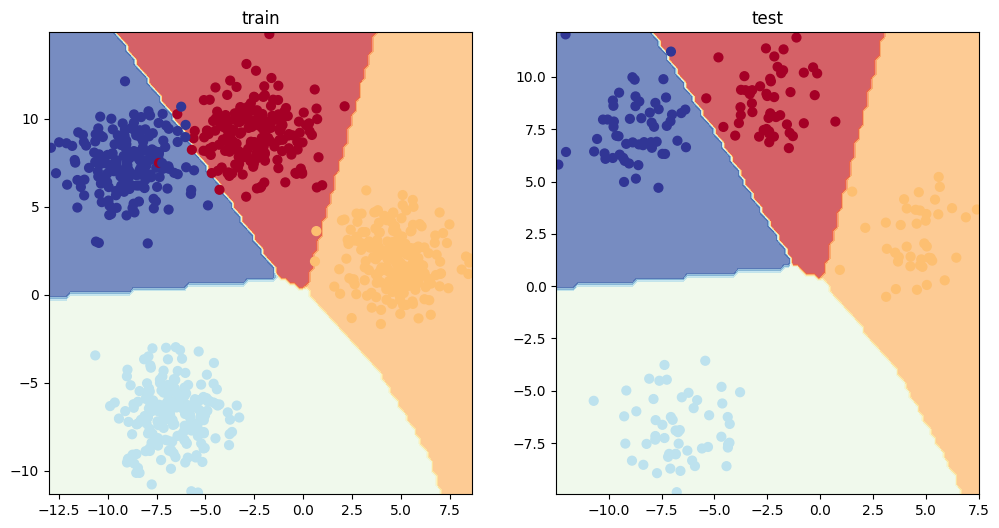

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("train")
plot_decision_boundary(model_4, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("test")
plot_decision_boundary(model_4, X_test, y_test)


## 9. A few more classification metrics... (to evaluate our classification model)

* Accuracy - out of 100 samples how many does the model get right
* precision
* recall
* F1-score
* confusion matrix
* Classification report


In [ ]:
!pip install torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 840.2/840.2 kB 12.5 MB/s eta 0:00:00


In [ ]:
from torchmetrics import Accuracy

task = 'multiclass'

# Setup metric
torchmetric_acc = Accuracy(task=task, num_classes=4).to(device)

torchmetric_acc(test_pred, y_test)

tensor(0.9950, device='cuda:0')

In [ ]:
torchmetric_acc.device

device(type='cuda', index=0)

## Exercises and Extra curriculum (binary model)

see exercises and extra curriculum here: https://github.com/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/02_pytorch_classification_exercises.ipynb

In [ ]:
!pip install torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 840.2/840.2 kB 11.4 MB/s eta 0:00:00


In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from torch import nn
from torchmetrics import Accuracy
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

### classification data



In [ ]:
# making the data

n_samples = 1000

X, y = make_moons(n_samples=n_samples,
                  noise=0.03,
                  random_state=42)

len(X), len(y)

(1000, 1000)

In [ ]:
print(f"first 5 samples of X: {X[:5]}")
print(f"first 5 samples of y: {y[:5]}")

first 5 samples of X: [[-0.00933187  0.39098105]
 [ 0.95457387 -0.47375583]
 [ 0.9185256  -0.42519648]
 [ 0.41276802 -0.37638459]
 [-0.84532016  0.52879908]]
first 5 samples of y: [1 1 1 1 0]


In [ ]:
# turn it into a data frame
moons = pd.DataFrame({'X1': X[:, 0],
                     'X2': X[:, 1],
                      'labeel': y})

moons.head(5)

,X1,X2,labeel
0,-0.009332,0.390981,1
1,0.954574,-0.473756,1
2,0.918526,-0.425196,1
3,0.412768,-0.376385,1
4,-0.845320,0.528799,0


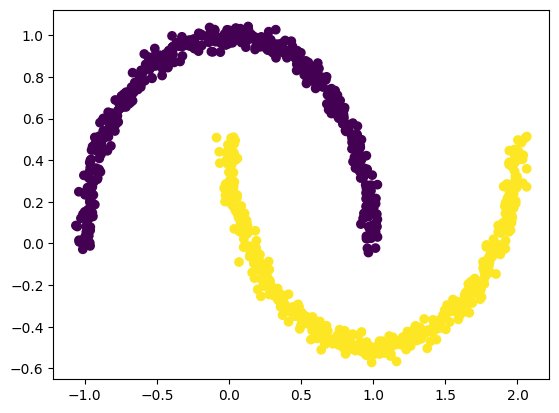

In [ ]:
# visualize with a scatter plot
plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y)

In [ ]:
# turn the data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

type(X), type(y)

(torch.Tensor, torch.Tensor)

In [ ]:
# splitting the data into train and test splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

len(X_train), len(X_test), len(y_train), len(y_test)


(800, 200, 800, 200)

### building a model

1. Setup device agnostic code so our code will run on an accelerator (GPU) if there is one
2. construct a model (by subclassing nn.Module)
3. define a loss function and optimizer
4. create a training and test loop

In [ ]:
# 1. device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"

device

'cpu'

In [ ]:
# building the binary classification model
class MoonModel_0(nn.Module):
  def __init__(self,):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)
    self.relu = nn.ReLU()

  def forward(self, x):
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model_5 = MoonModel_0().to(device)

In [ ]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_5.parameters(),
                            lr=0.1)

### build a training and test loop for the data

In [ ]:
task = 'binary'
torchmetric_acc = Accuracy(task=task, num_classes=2)

In [ ]:
# set the manual seed
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# send the data to the target device
X_train, X_test = X_train.to(device), X_test.to(device)
y_train, y_test = y_train.to(device), y_test.to(device)


# set the number of epochs
epochs = 1000

for epoch in range(epochs):
  model_5.train()

  # forward pass
  y_logits = model_5(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  # calculate the loss
  loss = loss_fn(y_pred, y_train)
  acc = torchmetric_acc(y_pred, y_train)

  # optimizer zero grad
  optimizer.zero_grad()

  # backpropagation
  loss.backward()

  # optimizer step
  optimizer.step()


  ### Testing
  model_5.eval()
  with torch.inference_mode():
    test_logits = model_5(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # calculate the loss
    test_loss = loss_fn(test_pred, y_test)
    test_acc = torchmetric_acc(test_pred, y_test)

  # print out the results
  if epoch % 100 == 0:
    print(f"epoch : {epoch} | loss {loss:.5f} | acc {acc:.2f}% | test loss {test_loss:.5f} | test acc {test_acc:.2f}%")


epoch : 0 | loss 0.86855 | acc 0.37% | test loss 0.83335 | test acc 0.39%
epoch : 100 | loss 0.86855 | acc 0.37% | test loss 0.83335 | test acc 0.39%
epoch : 200 | loss 0.86855 | acc 0.37% | test loss 0.83335 | test acc 0.39%
epoch : 300 | loss 0.86855 | acc 0.37% | test loss 0.83335 | test acc 0.39%
epoch : 400 | loss 0.86855 | acc 0.37% | test loss 0.83335 | test acc 0.39%
epoch : 500 | loss 0.86855 | acc 0.37% | test loss 0.83335 | test acc 0.39%
epoch : 600 | loss 0.86855 | acc 0.37% | test loss 0.83335 | test acc 0.39%
epoch : 700 | loss 0.86855 | acc 0.37% | test loss 0.83335 | test acc 0.39%
epoch : 800 | loss 0.86855 | acc 0.37% | test loss 0.83335 | test acc 0.39%
epoch : 900 | loss 0.86855 | acc 0.37% | test loss 0.83335 | test acc 0.39%


In [ ]:
model_5(X_train)

In [ ]:
type(test_logits)

builtin_function_or_method

In [ ]:
model_5(X_test).squeeze()

tensor([ 1.7279e-02,  1.3403e-02,  5.4212e-04,  1.2413e-03,  1.7282e-02,
         1.9893e-02,  1.2826e-02,  9.4329e-03, -3.6405e-03,  1.7530e-03,
         1.9909e-02, -3.1480e-03, -2.6613e-03,  1.9232e-02,  2.3746e-02,
         3.1049e-02,  2.9438e-02,  2.2979e-02,  1.7790e-02,  2.2513e-02,
         1.5397e-02,  2.2817e-02,  2.0784e-02, -3.7606e-03, -3.7081e-03,
         2.5098e-02, -3.9396e-04,  1.9011e-02,  7.1515e-03,  1.6255e-02,
         3.0455e-02, -3.2248e-03,  1.1828e-02,  2.7286e-02,  1.2929e-02,
         1.8387e-02,  1.4139e-02,  2.6893e-02,  2.9011e-02, -3.3171e-03,
         4.7063e-04,  1.8083e-02,  1.7225e-02,  2.2256e-02,  9.0369e-03,
         8.4075e-03,  2.7687e-02,  2.9731e-02,  1.6550e-02, -1.2205e-03,
        -3.0583e-03,  1.5703e-02,  2.2531e-05,  1.0290e-03,  2.3766e-02,
        -2.2408e-03,  8.1830e-05,  2.0222e-02,  2.6431e-02,  1.9549e-02,
         3.1611e-02,  1.6832e-02,  1.7415e-02,  2.9033e-02, -2.0133e-03,
         1.7770e-02,  1.0721e-02,  2.7237e-02,  1.1

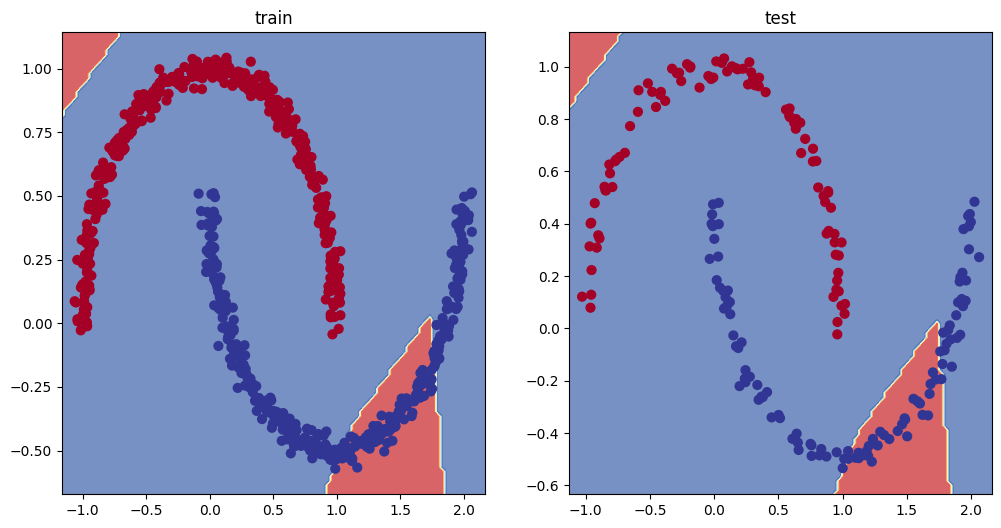

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("train")
plot_decision_boundary(model_5, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("test")
plot_decision_boundary(model_5, X_test, y_test)


### 5. Improving a model (from a model perspective)

* Add more layers - give the model more chances to learn about patterns in the data
* Add more hidden units - go from 5 hidden units(in/outputs) to 10 hidden units
* Fit for longer - run it for 1000 epochs instead of 200
* Changing the activation function
* Change the learning rate
* Change the loss function

These options are all from a models perspective because they deal directly with the model, rather than the data

Lets try and improve our model by:
* Adding more hidden units: 5 -> 10
* Increase the number of layers: 2 -> 3
* Increase the number of epochs: 100 -> 1000

**NOTE**: in any experiment you should usually change one hyper parameter at a time so you can track which one is beneficial

In [ ]:
# lets try to add more layers in our neural network
# and lower the learning rate

# building the binary classification model
class MoonModel_1(nn.Module):
  def __init__(self,):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=10)
    self.layer_4 = nn.Linear(in_features=10, out_features=10)
    self.layer_5 = nn.Linear(in_features=10, out_features=1)
    self.relu = nn.ReLU()

  def forward(self, x):
    return self.layer_5(self.layer_4(self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))))

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model_5 = MoonModel_0().to(device)


In [ ]:
optimizer = torch.optim.SGD(params=model_5.parameters(),
                            lr=0.1)

In [ ]:
# set the manual seed
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# send the data to the target device
X_train, X_test = X_train.to(device), X_test.to(device)
y_train, y_test = y_train.to(device), y_test.to(device)


# set the number of epochs
epochs = 1000

for epoch in range(epochs):
  model_5.train()

  # forward pass
  y_logits = model_5(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  # calculate the loss
  loss = loss_fn(y_pred, y_train)
  acc = torchmetric_acc(y_pred, y_train)

  # optimizer zero grad
  optimizer.zero_grad()

  # backpropagation
  loss.backward()

  # optimizer step
  optimizer.step()


  ### Testing
  model_5.eval()
  with torch.inference_mode():
    test_logits = model_5(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # calculate the loss
    test_loss = loss_fn(test_pred, y_test)
    test_acc = torchmetric_acc(test_pred, y_test)

  # print out the results
  if epoch % 100 == 0:
    print(f"epoch : {epoch} | loss {loss:.5f} | acc {acc:.2f}% | test loss {test_loss:.5f} | test acc {test_acc:.2f}%")


epoch : 0 | loss 0.86855 | acc 0.37% | test loss 0.83335 | test acc 0.39%
epoch : 100 | loss 0.86855 | acc 0.37% | test loss 0.83335 | test acc 0.39%
epoch : 200 | loss 0.86855 | acc 0.37% | test loss 0.83335 | test acc 0.39%
epoch : 300 | loss 0.86855 | acc 0.37% | test loss 0.83335 | test acc 0.39%
epoch : 400 | loss 0.86855 | acc 0.37% | test loss 0.83335 | test acc 0.39%
epoch : 500 | loss 0.86855 | acc 0.37% | test loss 0.83335 | test acc 0.39%
epoch : 600 | loss 0.86855 | acc 0.37% | test loss 0.83335 | test acc 0.39%
epoch : 700 | loss 0.86855 | acc 0.37% | test loss 0.83335 | test acc 0.39%
epoch : 800 | loss 0.86855 | acc 0.37% | test loss 0.83335 | test acc 0.39%
epoch : 900 | loss 0.86855 | acc 0.37% | test loss 0.83335 | test acc 0.39%


In [ ]:
# lets try changing the activation function
# building the binary classification model
class MoonModel_2(nn.Module):
  def __init__(self,):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)
    self.relu = nn.Sigmoid()

  def forward(self, x):
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model_5 = MoonModel_2().to(device)

In [ ]:
# set the manual seed
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# send the data to the target device
X_train, X_test = X_train.to(device), X_test.to(device)
y_train, y_test = y_train.to(device), y_test.to(device)


# set the number of epochs
epochs = 1000

for epoch in range(epochs):
  model_5.train()

  # forward pass
  y_logits = model_5(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  # calculate the loss
  loss = loss_fn(y_pred, y_train)
  acc = torchmetric_acc(y_pred, y_train)

  # optimizer zero grad
  optimizer.zero_grad()

  # backpropagation
  loss.backward()

  # optimizer step
  optimizer.step()


  ### Testing
  model_5.eval()
  with torch.inference_mode():
    test_logits = model_5(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # calculate the loss
    test_loss = loss_fn(test_pred, y_test)
    test_acc = torchmetric_acc(test_pred, y_test)

  # print out the results
  if epoch % 100 == 0:
    print(f"epoch : {epoch} | loss {loss:.5f} | acc {acc:.2f}% | test loss {test_loss:.5f} | test acc {test_acc:.2f}%")


epoch : 0 | loss 0.82201 | acc 0.49% | test loss 0.77826 | test acc 0.54%
epoch : 100 | loss 0.82201 | acc 0.49% | test loss 0.77826 | test acc 0.54%
epoch : 200 | loss 0.82201 | acc 0.49% | test loss 0.77826 | test acc 0.54%
epoch : 300 | loss 0.82201 | acc 0.49% | test loss 0.77826 | test acc 0.54%
epoch : 400 | loss 0.82201 | acc 0.49% | test loss 0.77826 | test acc 0.54%
epoch : 500 | loss 0.82201 | acc 0.49% | test loss 0.77826 | test acc 0.54%
epoch : 600 | loss 0.82201 | acc 0.49% | test loss 0.77826 | test acc 0.54%
epoch : 700 | loss 0.82201 | acc 0.49% | test loss 0.77826 | test acc 0.54%
epoch : 800 | loss 0.82201 | acc 0.49% | test loss 0.77826 | test acc 0.54%
epoch : 900 | loss 0.82201 | acc 0.49% | test loss 0.77826 | test acc 0.54%


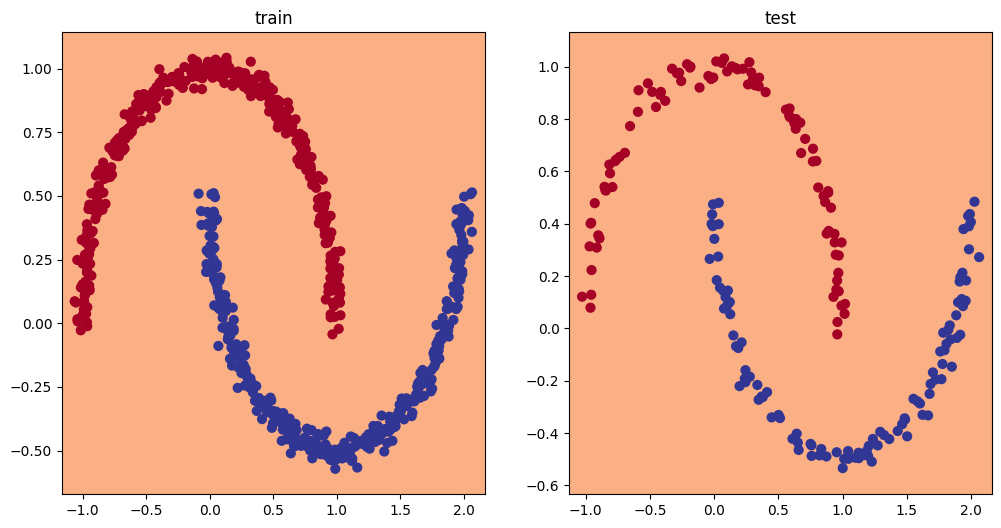

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("train")
plot_decision_boundary(model_5, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("test")
plot_decision_boundary(model_5, X_test, y_test)

In [ ]:
# lets try changing the optimizer
class MoonModel_3(nn.Module):
  def __init__(self,):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=10)
    self.layer_4 = nn.Linear(in_features=10, out_features=10)
    self.layer_5 = nn.Linear(in_features=10, out_features=1)
    self.relu = nn.ReLU()

  def forward(self, x):
    return self.layer_5(self.layer_4(self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))))

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model_5 = MoonModel_3().to(device)

In [ ]:
optimizer = torch.optim.SGD(model_5.parameters(), lr=0.1)

In [ ]:
# set the manual seed
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# send the data to the target device
X_train, X_test = X_train.to(device), X_test.to(device)
y_train, y_test = y_train.to(device), y_test.to(device)


# set the number of epochs
epochs = 1000

for epoch in range(epochs):
  model_5.train()

  # forward pass
  y_logits = model_5(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  # calculate the loss
  loss = loss_fn(y_pred, y_train)
  acc = torchmetric_acc(y_pred, y_train)

  # optimizer zero grad
  optimizer.zero_grad()

  # backpropagation
  loss.backward()

  # optimizer step
  optimizer.step()


  ### Testing
  model_5.eval()
  with torch.inference_mode():
    test_logits = model_5(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # calculate the loss
    test_loss = loss_fn(test_pred, y_test)
    test_acc = torchmetric_acc(test_pred, y_test)

  # print out the results
  if epoch % 100 == 0:
    print(f"epoch : {epoch} | loss {loss:.5f} | acc {acc:.2f}% | test loss {test_loss:.5f} | test acc {test_acc:.2f}%")


epoch : 0 | loss 0.69315 | acc 0.51% | test loss 0.69315 | test acc 0.47%
epoch : 100 | loss 0.69315 | acc 0.51% | test loss 0.69315 | test acc 0.47%
epoch : 200 | loss 0.69315 | acc 0.51% | test loss 0.69315 | test acc 0.47%
epoch : 300 | loss 0.69315 | acc 0.51% | test loss 0.69315 | test acc 0.47%
epoch : 400 | loss 0.69315 | acc 0.51% | test loss 0.69315 | test acc 0.47%
epoch : 500 | loss 0.69315 | acc 0.51% | test loss 0.69315 | test acc 0.47%
epoch : 600 | loss 0.69315 | acc 0.51% | test loss 0.69315 | test acc 0.47%
epoch : 700 | loss 0.69315 | acc 0.51% | test loss 0.69315 | test acc 0.47%
epoch : 800 | loss 0.69315 | acc 0.51% | test loss 0.69315 | test acc 0.47%
epoch : 900 | loss 0.69315 | acc 0.51% | test loss 0.69315 | test acc 0.47%


### Finally got it right!

In [ ]:
# lets try adding more hidden units
# lets try changing the optimizer
class MoonModel_4(nn.Module):
  def __init__(self,):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=30)
    self.layer_2 = nn.Linear(in_features=30, out_features=30)
    self.layer_3 = nn.Linear(in_features=30, out_features=1)
    self.relu = nn.ReLU()

  def forward(self, x):
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model_5 = MoonModel_4().to(device)

In [ ]:
optimizer = torch.optim.SGD(model_5.parameters(), lr=0.1)

In [ ]:
# set the manual seed
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# send the data to the target device
X_train, X_test = X_train.to(device), X_test.to(device)
y_train, y_test = y_train.to(device), y_test.to(device)


# set the number of epochs
epochs = 1000

for epoch in range(epochs):
  model_5.train()

  # forward pass
  y_logits = model_5(X_train).squeeze()
  y_pred_probs = torch.sigmoid(y_logits)
  y_pred = torch.round(y_pred_probs)

  # calculate the loss
  loss = loss_fn(y_logits, y_train)
  acc = torchmetric_acc(y_pred, y_train.int())

  # optimizer zero grad
  optimizer.zero_grad()

  # backpropagation
  loss.backward()

  # optimizer step
  optimizer.step()


  ### Testing
  model_5.eval()
  with torch.inference_mode():
    test_logits = model_5(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # calculate the loss
    test_loss = loss_fn(test_logits, y_test)
    test_acc = torchmetric_acc(test_pred, y_test.int())

  # print out the results
  if epoch % 100 == 0:
    print(f"epoch : {epoch} | loss {loss:.5f} | acc {acc:.2f}% | test loss {test_loss:.5f} | test acc {test_acc:.2f}%")


epoch : 0 | loss 0.69831 | acc 0.49% | test loss 0.69078 | test acc 0.54%
epoch : 100 | loss 0.26388 | acc 0.87% | test loss 0.28997 | test acc 0.85%
epoch : 200 | loss 0.19204 | acc 0.91% | test loss 0.21709 | test acc 0.90%
epoch : 300 | loss 0.14619 | acc 0.94% | test loss 0.16778 | test acc 0.92%
epoch : 400 | loss 0.09950 | acc 0.96% | test loss 0.11532 | test acc 0.94%
epoch : 500 | loss 0.06059 | acc 0.99% | test loss 0.07038 | test acc 0.98%
epoch : 600 | loss 0.03700 | acc 1.00% | test loss 0.04299 | test acc 1.00%
epoch : 700 | loss 0.02433 | acc 1.00% | test loss 0.02825 | test acc 1.00%
epoch : 800 | loss 0.01728 | acc 1.00% | test loss 0.02007 | test acc 1.00%
epoch : 900 | loss 0.01303 | acc 1.00% | test loss 0.01515 | test acc 1.00%


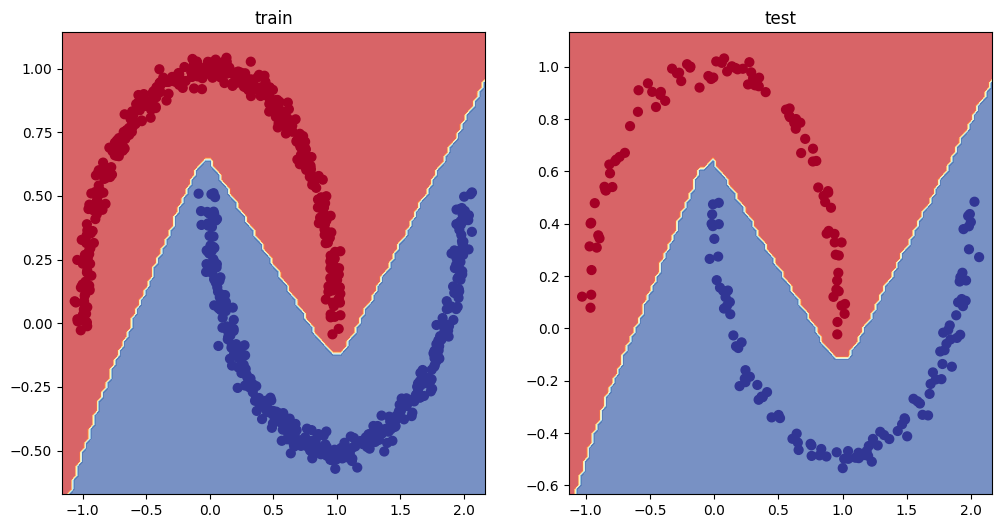

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("train")
plot_decision_boundary(model_5, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("test")
plot_decision_boundary(model_5, X_test, y_test)

## Exercises and extra curriculum (multi-class model)

In [ ]:
import torch
import matplotlib.pyplot as plt
from torch import nn
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd


### Preparing the data

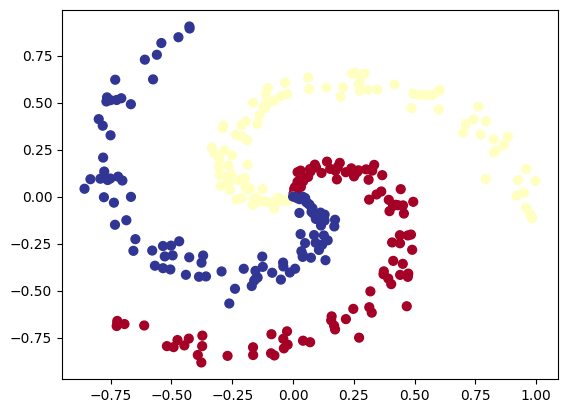

In [ ]:
# creating the data

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K, D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels

for j in range(K):
  ix = range(N*j, N*(j + 1))
  r = np.linspace(0.0, 1, N) # radius
  t = np.linspace(j*4, (j+1)*4, N) + np.random.randn(N)* 0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j

# visulaize the data
plt.scatter(X[:, 0],
            X[:, 1],
            c=y,
            s=40,
            cmap=plt.cm.RdYlBu)
plt.show()

In [ ]:
# turning the data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.LongTensor)

In [ ]:
X[:5], torch.unique(y)

(tensor([[0.0000, 0.0000],
         [0.0001, 0.0101],
         [0.0042, 0.0198],
         [0.0125, 0.0276],
         [0.0046, 0.0401]]),
 tensor([0, 1, 2]))

In [ ]:
!pip install torchmetrics
from torchmetrics import Accuracy

In [ ]:
# Split the data into train and test splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# setting up the function

task = 'multiclass'
acc_fn = Accuracy(task=task, num_classes=3)
acc_fn

MulticlassAccuracy()

### Creating a model for the multiclass data

In [ ]:
# building the multi-class model

class SpiralModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units=10):
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=input_features, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_features)
    )

  def forward(self, x):
    return self.linear_layer_stack(x)

model_6 = SpiralModel(input_features=2, # how many features (x) has
                      output_features=3, # how many classes are in (y)
                      hidden_units=10)

model_6

SpiralModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): ReLU()
    (2): Linear(in_features=10, out_features=10, bias=True)
    (3): ReLU()
    (4): Linear(in_features=10, out_features=3, bias=True)
  )
)

In [ ]:
model_6.state_dict()

OrderedDict([('linear_layer_stack.0.weight',
              tensor([[-0.1807, -0.4035],
                      [-0.2421, -0.5283],
                      [ 0.2522,  0.5473],
                      [-0.6657,  0.1642],
                      [ 0.3653,  0.1282],
                      [-0.2518,  0.3691],
                      [ 0.3716,  0.2644],
                      [-0.1243, -0.1872],
                      [ 0.0756, -0.1249],
                      [-0.2107,  0.4520]])),
             ('linear_layer_stack.0.bias',
              tensor([ 0.6077, -0.0700, -0.1583,  0.0103, -0.0422,  0.1700,  0.1982, -0.6422,
                      -0.2609,  0.5955])),
             ('linear_layer_stack.2.weight',
              tensor([[ 0.1232, -0.0157, -0.1907, -0.1935, -0.2833, -0.1031,  0.1068,  0.2016,
                        0.1460, -0.2795],
                      [-0.1902, -0.0499,  0.3059,  0.0457, -0.0819,  0.1308, -0.1204, -0.2047,
                        0.2308, -0.1438],
                      [-0.0634, -

In [ ]:
# creating the loss for multi-class
loss_fn = nn.CrossEntropyLoss()

# creating the optimizer
optimizer = torch.optim.SGD(params=model_6.parameters(),
                            lr=0.1)

### creating the training loop for the data

In [ ]:
# Print the first few predictions

print(f"\nfirst 5 logits:\n{model_6(X)[:5]}")
print(f"\nfirst 5 predictions:\n{torch.softmax(model_6(X), dim=1).argmax(dim=1)[:5]}")


first 5 logits:
tensor([[-0.3486, -0.2289, -0.2318],
        [-0.3482, -0.2292, -0.2316],
        [-0.3480, -0.2292, -0.2313],
        [-0.3478, -0.2290, -0.2307],
        [-0.3473, -0.2300, -0.2312]], grad_fn=<SliceBackward0>)

first 5 predictions:
tensor([1, 1, 1, 1, 1])


In [ ]:
# building a training and testing loop

torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 3000

for epoch in range(epochs):
  model_6.train()

  y_logits = model_6(X_train)
  y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)

  loss = loss_fn(y_logits, y_train)
  acc = acc_fn(y_pred, y_train)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  ### Testing
  model_6.eval()
  with torch.inference_mode():
    test_logits = model_6(X_test)
    test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)

    test_loss = loss_fn(test_logits, y_test)
    test_acc = acc_fn(test_pred, y_test)

  if epoch % 100 == 0:
    print(f"epoch: {epoch} | loss: {loss:.5f} | acc: {acc:.2f}% | test loss: {test_loss:.5f} | test acc: {test_acc:.5f}")


epoch: 0 | loss: 0.22614 | acc: 0.93% | test loss: 0.29129 | test acc: 0.88333
epoch: 100 | loss: 0.18958 | acc: 0.94% | test loss: 0.24899 | test acc: 0.90000
epoch: 200 | loss: 0.16173 | acc: 0.96% | test loss: 0.21750 | test acc: 0.90000
epoch: 300 | loss: 0.14066 | acc: 0.98% | test loss: 0.19112 | test acc: 0.93333
epoch: 400 | loss: 0.12341 | acc: 0.98% | test loss: 0.17003 | test acc: 0.95000
epoch: 500 | loss: 0.10985 | acc: 0.98% | test loss: 0.15463 | test acc: 0.95000
epoch: 600 | loss: 0.09905 | acc: 0.98% | test loss: 0.14265 | test acc: 0.95000
epoch: 700 | loss: 0.09028 | acc: 0.98% | test loss: 0.13253 | test acc: 0.95000
epoch: 800 | loss: 0.08303 | acc: 0.98% | test loss: 0.12338 | test acc: 0.96667
epoch: 900 | loss: 0.07704 | acc: 0.98% | test loss: 0.11576 | test acc: 0.98333
epoch: 1000 | loss: 0.07201 | acc: 0.98% | test loss: 0.10964 | test acc: 0.98333
epoch: 1100 | loss: 0.06769 | acc: 0.98% | test loss: 0.10434 | test acc: 0.98333
epoch: 1200 | loss: 0.06400 

### Plot the decision boundary

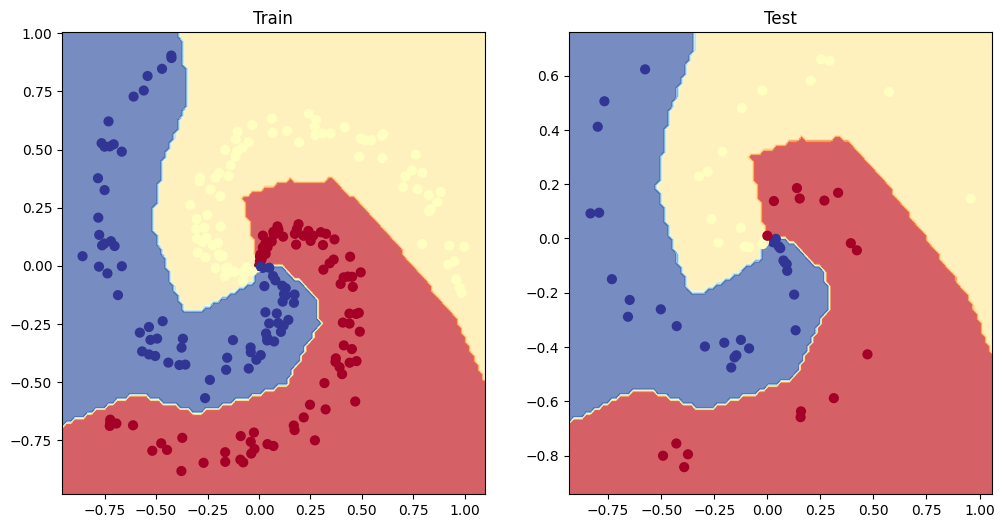

In [ ]:
# plot decision boundary of the model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_6, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_6, X_test, y_test)